In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load dataset from TensorFlow
mnist = keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


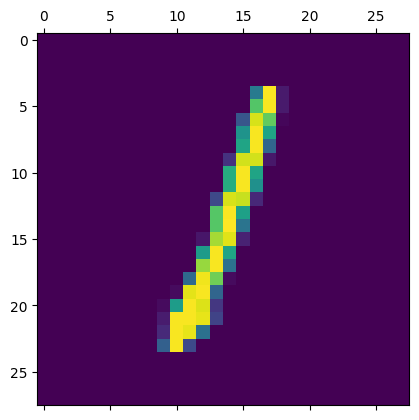

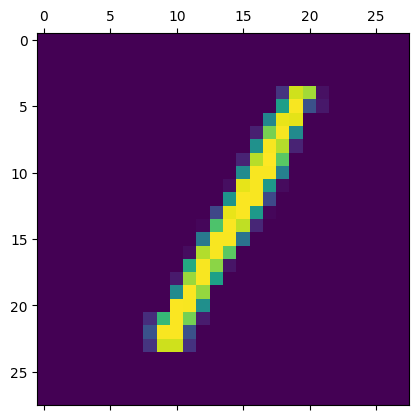

In [ ]:
plt.matshow(x_test[7000])
plt.matshow(x_train[55000])

In [ ]:
print(y_test[7000])

1


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0     #Divides every pixel by 255 to scale values between 0 and 1.


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshaping to (number_of_samples, 28, 28, 1), where -1 automatically calculates the batch size
x_test = x_test.reshape(-1, 28, 28, 1)    # Reshaping to (number_of_samples, 28, 28, 1) for the test set


In [ ]:
model = keras.Sequential([
    # Convolutional Layer (Extracts features from images)
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),     #Conv2D(32, (3,3)) → Uses 32 filters of size 3×3.

    # Max Pooling Layer (Reduces image size)
    keras.layers.MaxPooling2D(2,2),

    # Flatten Layer (Converts image data into a 1D vector)
    keras.layers.Flatten(),

    # Fully Connected Layer (Processes extracted features)
    keras.layers.Dense(128, activation='relu'),

    # Output Layer (10 classes for digits 0-9)
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - accuracy: 0.9087 - loss: 0.3039
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9840 - loss: 0.0527
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9906 - loss: 0.0311
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - accuracy: 0.9939 - loss: 0.0194
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9956 - loss: 0.0137


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")




313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9837 - loss: 0.0697
Test Accuracy: 0.9870
Test Loss: 0.0532


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


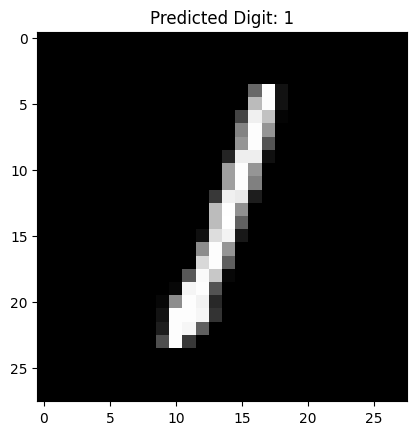

In [ ]:
predictions = model.predict(x_test)

# Pick an image from test set
index = 7000  # Change this value to test other images
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')

# Get the predicted label
predicted_label = np.argmax(predictions[index])
plt.title(f"Predicted Digit: {predicted_label}")
plt.show()
